In [96]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [98]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# data cleaning

In [99]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [100]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [101]:
#we delete the columns Unnamed2,Unnamed3 and Unnamed4

In [102]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [103]:
df=df.rename(columns={"v1":"target","v2":"sms"})


In [104]:
df.isnull().sum()



target    0
sms       0
dtype: int64

In [105]:

df.duplicated().sum()

403

In [106]:

df = df.drop_duplicates(keep='first')

In [107]:
df.duplicated().sum()


0

In [108]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [109]:
df['target'] = encoder.fit_transform(df['target'])


In [123]:
df.head(5)

,target,sms,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


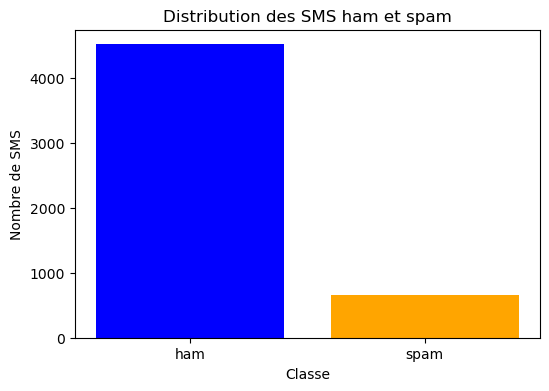

In [110]:
import matplotlib.pyplot as plt

class_counts = df['target'].value_counts()

# Créer un diagramme à barres
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['ham', 'spam'])
plt.xlabel('Classe')
plt.ylabel('Nombre de SMS')
plt.title('Distribution des SMS ham et spam')
plt.show()


In [111]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Garder seulement les lettres
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text)
    return text



In [112]:
clean_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gonna home soon want talk stuff anymor tonight k cri enough today'

In [113]:
df['transformed_sms'] = df['sms'].apply(clean_text)


In [114]:
df

,target,sms,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,nd time tri contact u u pound prize claim easi...
5568,0,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)  
X = tfidf.fit_transform(df['sms']).toarray()
y = df['target'].values


In [122]:
print(y)

[0 0 1 ... 0 0 0]


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [119]:
y_pred = model.predict(X_test)


In [120]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.97678916827853
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Confusion Matrix:
 [[889   0]
 [ 24 121]]


# Test the model


In [121]:
# Test the model
def predict_sms(model, vectorizer, sms):
    sms_vectorized = vectorizer.transform([sms])
    prediction = model.predict(sms_vectorized)
    return "spam" if prediction[0] == 1 else "ham"

# Exemple of sms to test
sms = "Congratulations! You've won a free ticket to the Bahamas. Click here to claim your prize."
result = predict_sms(model, tfidf, sms)  # Utilise 'tfidf' pour le vectoriseur et 'model' pour le modèle
print(f'The SMS "{sms}" is classified as: {result}')


The SMS "Congratulations! You've won a free ticket to the Bahamas. Click here to claim your prize." is classified as: spam


# Serialization 

In [124]:
import joblib

# Save the model and the vectoriser
joblib.dump(model, 'spam_classifier_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']